In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import preprocessing 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support
from sklearn.preprocessing import StandardScaler

from imblearn.combine import SMOTETomek
from imblearn.under_sampling import NearMiss

from collections import Counter

In [2]:
df = pd.read_csv('creditcard.csv')

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.isnull().sum().value_counts() #No null values

0    31
dtype: int64

In [6]:
df.info()
df.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.919560e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.688174e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.769071e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.782312e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552563e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.010663e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.694249e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.927028e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.137024e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


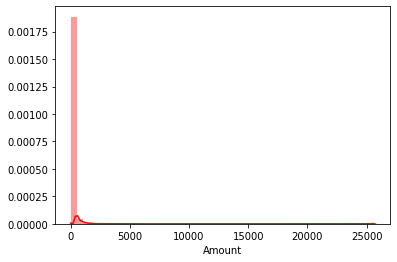

In [7]:
sns.distplot(df['Amount'], color='r')

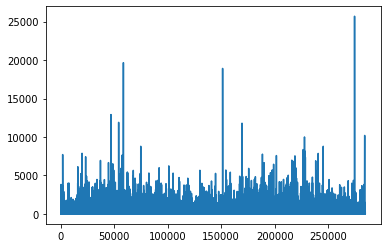

In [8]:
df['Amount'].plot()
#df['Amount'].rolling(20).mean().plot()

Text(0.5, 1.0, 'Class strength \n (0: No Fraud || 1: Fraud)')

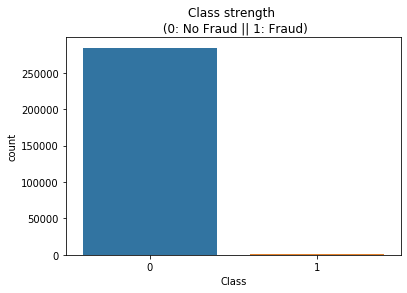

In [9]:
#colors = ['red', 'yellow']
sns.countplot('Class', data=df)
plt.title('Class strength \n (0: No Fraud || 1: Fraud)')

In [10]:
print('Maximum: ',df['Amount'].mean())
print('Mean: ',df['Amount'].sum())

Maximum:  88.34961925087359
Mean:  25162590.009999998


In [11]:
df['Class'].value_counts() #Unbalanced

0    284315
1       492
Name: Class, dtype: int64

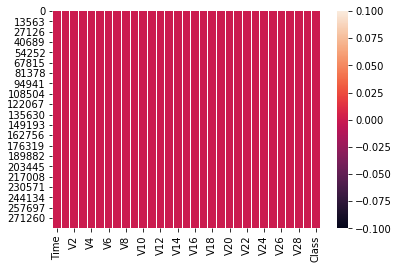

In [12]:
sns.heatmap(df.isnull())

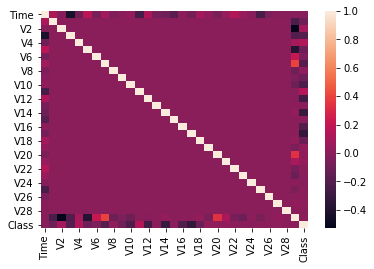

In [13]:
sns.heatmap(df.corr()) #Most values are near 0, so not correlated

#### Up-sampling the data using 'Imbalanced' library

In [14]:
state = np.random.RandomState(42)
X = df.drop(['Class'], axis = 1)
Y = df['Class']

print(X.shape)
print(Y.shape)

(284807, 30)
(284807,)


In [15]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]

print(fraud.shape,normal.shape)

(492, 31) (284315, 31)


In [16]:
# Implementing Oversampling for Handling Imbalanced 
smk = SMOTETomek(random_state=42)
X_res,y_res = smk.fit_sample(X,Y)
X_res.shape,y_res.shape

((567562, 30), (567562,))

In [17]:
print('Original dataset shape {}'.format(Counter(Y)))
print('Resampled dataset shape {}'.format(Counter(y_res)))

Original dataset shape Counter({0: 284315, 1: 492})
Resampled dataset shape Counter({0: 283781, 1: 283781})


In [18]:
le = preprocessing.LabelEncoder()
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.40, random_state=101)

## Logistic Regression

In [19]:
from sklearn.linear_model import LogisticRegression

In [20]:
logistic_model = LogisticRegression()
logistic_model.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [21]:
logistic_prediction = logistic_model.predict(X_test)

In [22]:
print(classification_report(y_test,logistic_prediction))

              precision    recall  f1-score   support

           0       0.97      0.98      0.97    113872
           1       0.98      0.96      0.97    113153

    accuracy                           0.97    227025
   macro avg       0.97      0.97      0.97    227025
weighted avg       0.97      0.97      0.97    227025



In [23]:
tn_logistic, fp_logistic, fn_logistic, tp_logistic = confusion_matrix(y_test,logistic_prediction).flatten()
print('True Negatives: ',tn_logistic)
print('False Positives: ',fp_logistic)
print('False Negatives: ',fn_logistic)
print('True Postives: ',tp_logistic)

True Negatives:  111593
False Positives:  2279
False Negatives:  4027
True Postives:  109126


In [24]:
precision_logistic, recall_logistic, f1_logistic, _ = precision_recall_fscore_support(y_test, logistic_prediction, average='macro')
print('Precision: ',precision_logistic)
print('Recall: ',recall_logistic)
print('F1 score: ',f1_logistic)

Precision:  0.9723567471122431
Recall:  0.9721986595583282
F1 score:  0.9722200430550451


## Decision Tree

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
dtree_model = DecisionTreeClassifier()
dtree_model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [27]:
dtree_prediction = dtree_model.predict(X_test)

In [28]:
print(classification_report(y_test,dtree_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    113872
           1       1.00      1.00      1.00    113153

    accuracy                           1.00    227025
   macro avg       1.00      1.00      1.00    227025
weighted avg       1.00      1.00      1.00    227025



In [29]:
tn_dtree, fp_dtree, fn_dtree, tp_dtree = confusion_matrix(y_test,dtree_prediction).flatten()
print('True Negatives: ',tn_dtree)
print('False Positives: ',fp_dtree)
print('False Negatives: ',fn_dtree)
print('True Postives: ',tp_dtree)

True Negatives:  113547
False Positives:  325
False Negatives:  131
True Postives:  113022


In [30]:
precision_dtree, recall_dtree, f1_dtree, _ = precision_recall_fscore_support(y_test, dtree_prediction, average='macro')
print('Precision: ',precision_dtree)
print('Recall: ',recall_dtree)
print('F1 score: ',f1_dtree)

Precision:  0.9979901604675971
Recall:  0.9979940968635254
F1 score:  0.9979913998961003


## K Nearest Neighbours

In [31]:
scaler = StandardScaler()

In [32]:
scaler.fit(df.drop('Class',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [33]:
scaled_features = scaler.transform(df.drop('Class',axis=1))

In [34]:
df1 = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df1.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.996583,-0.694242,-0.044075,1.672773,0.973366,-0.245117,0.347068,0.193679,0.082637,0.331128,0.083386,-0.540407,-0.618296,-0.996099,-0.324610,1.604014,-0.536833,0.244863,0.030770,0.496282,0.326118,-0.024923,0.382854,-0.176911,0.110507,0.246585,-0.392170,0.330892,-0.063781,0.244964
1,-1.996583,0.608496,0.161176,0.109797,0.316523,0.043483,-0.061820,-0.063700,0.071253,-0.232494,-0.153350,1.580003,1.066089,0.491418,-0.149982,0.694360,0.529434,-0.135170,-0.218763,-0.179086,-0.089611,-0.307377,-0.880077,0.162201,-0.561131,0.320694,0.261069,-0.022256,0.044608,-0.342475
2,-1.996562,-0.693500,-0.811578,1.169468,0.268231,-0.364572,1.351454,0.639776,0.207373,-1.378675,0.190700,0.611830,0.066137,0.720700,-0.173114,2.562906,-3.298235,1.306868,-0.144790,-2.778561,0.680975,0.337632,1.063358,1.456320,-1.138092,-0.628537,-0.288447,-0.137137,-0.181021,1.160686
3,-1.996562,-0.493325,-0.112169,1.182516,-0.609727,-0.007469,0.936150,0.192071,0.316018,-1.262503,-0.050468,-0.221892,0.178371,0.510169,-0.300360,-0.689837,-1.209296,-0.805445,2.345305,-1.514205,-0.269855,-0.147443,0.007267,-0.304777,-1.941027,1.241904,-0.460217,0.155396,0.186189,0.140534
4,-1.996541,-0.591330,0.531541,1.021412,0.284655,-0.295015,0.071999,0.479302,-0.226510,0.744326,0.691625,-0.806147,0.538627,1.352244,-1.168034,0.191323,-0.515205,-0.279081,-0.045569,0.987037,0.529939,-0.012839,1.100011,-0.220123,0.233250,-0.395202,1.041611,0.543620,0.651816,-0.073403


In [35]:
X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['Class'],test_size=0.60)

In [36]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
for i in range(1,40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [37]:
KNN_model = KNeighborsClassifier(n_neighbors=1)

KNN_model.fit(X_train,y_train)
KNN_prediction = KNN_model.predict(X_test)

In [38]:
print(classification_report(y_test,KNN_prediction))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170582
           1       0.86      0.76      0.81       303

    accuracy                           1.00    170885
   macro avg       0.93      0.88      0.90    170885
weighted avg       1.00      1.00      1.00    170885



In [39]:
tn_KNN, fp_KNN, fn_KNN, tp_KNN = confusion_matrix(y_test,KNN_prediction).flatten()
print('True Negatives: ',tn_KNN)
print('False Positives: ',fp_KNN)
print('False Negatives: ',fn_KNN)
print('True Postives: ',tp_KNN)

True Negatives:  170544
False Positives:  38
False Negatives:  73
True Postives:  230


In [40]:
precision_KNN, recall_KNN, f1_KNN, _ = precision_recall_fscore_support(y_test, KNN_prediction, average='macro')
print('Precision: ',precision_KNN)
print('Recall: ',recall_KNN)
print('F1 score: ',f1_KNN)

Precision:  0.9288905481676294
Recall:  0.87942657041378
F1 score:  0.9026394399036685


## Support Vector Machines

In [41]:
from sklearn.svm import SVC

In [42]:
SVM_model = SVC()
SVM_model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [43]:
SVM_predictions = SVM_model.predict(X_test)

In [44]:
print(classification_report(y_test,SVM_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170582
           1       0.94      0.61      0.74       303

    accuracy                           1.00    170885
   macro avg       0.97      0.81      0.87    170885
weighted avg       1.00      1.00      1.00    170885



In [55]:
tn_SVM, fp_SVM, fn_SVM, tp_SVM = confusion_matrix(y_test,SVM_predictions).flatten()
print('True Negatives: ',tn_SVM)
print('False Positives: ',fp_SVM)
print('False Negatives: ',fn_SVM)
print('True Postives: ',tp_SVM)

True Negatives:  170570
False Positives:  12
False Negatives:  118
True Postives:  185


In [56]:
precision_SVM, recall_SVM, f1_SVM, _ = precision_recall_fscore_support(y_test, SVM_predictions, average='macro')
print('Precision: ',precision_SVM)
print('Recall: ',recall_SVM)
print('F1 score: ',f1_SVM)

Precision:  0.9691974872906115
Recall:  0.8052453543533529
F1 score:  0.8698095349723094


## Random Forest

In [47]:
from sklearn.ensemble import RandomForestClassifier

randomf_model = RandomForestClassifier(max_depth=2, random_state=0)
randomf_model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [48]:
randomf_predictions = randomf_model.predict(X_test)

In [49]:
print(classification_report(y_test,randomf_predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    170582
           1       0.86      0.53      0.66       303

    accuracy                           1.00    170885
   macro avg       0.93      0.77      0.83    170885
weighted avg       1.00      1.00      1.00    170885



In [50]:
tn_randomf, fp_randomf, fn_randomf, tp_randomf = confusion_matrix(y_test, randomf_predictions).flatten()
print('True Negatives: ',tn_randomf)
print('False Positives: ',fp_randomf)
print('False Negatives: ',fn_randomf)
print('True Postives: ',tp_randomf)

True Negatives:  170556
False Positives:  26
False Negatives:  142
True Postives:  161


In [51]:
precision_randomf, recall_randomf, f1_randomf, _ = precision_recall_fscore_support(y_test, randomf_predictions, average='macro')
print('Precision: ',precision_randomf)
print('Recall: ',recall_randomf)
print('F1 score: ',f1_randomf)

Precision:  0.9300653441613086
Recall:  0.7656003579746187
F1 score:  0.828325296363271
